# Examples of Tick's Documentation

In [7]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Simulation of 3-dimensional hawkes process

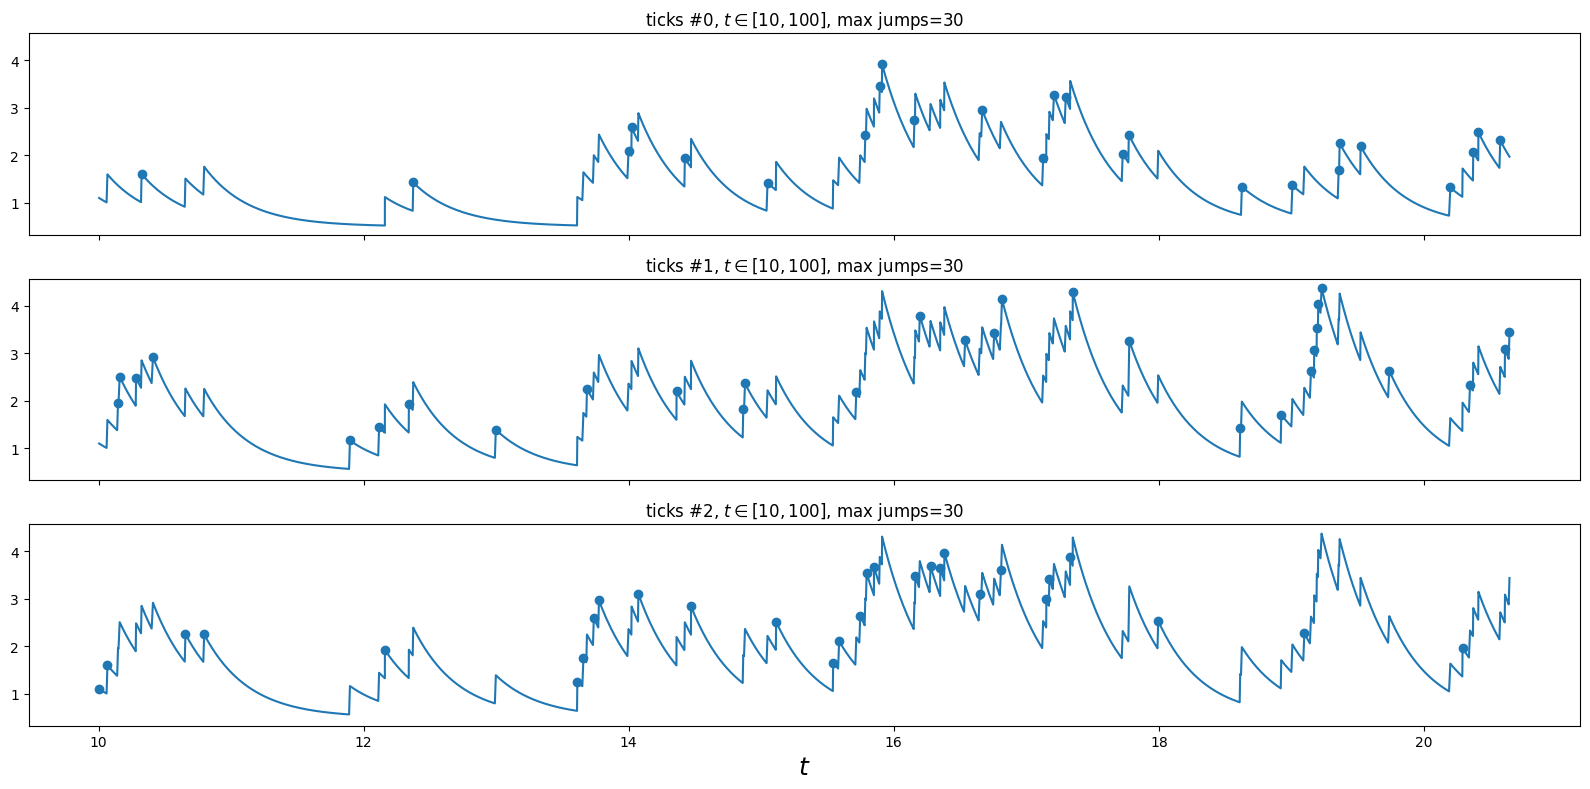

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from tick.hawkes import SimuHawkesExpKernels
from tick.plot import plot_point_process

n_nodes = 3  # dimension of the Hawkes process
adjacency = 0.2 * np.ones((n_nodes, n_nodes))
adjacency[0, 1] = 0
decays = 3 * np.ones((n_nodes, n_nodes))
baseline = 0.5 * np.ones(n_nodes)
hawkes = SimuHawkesExpKernels(adjacency=adjacency, decays=decays,
                              baseline=baseline, verbose=False, seed=2398)

run_time = 100
hawkes.end_time = run_time
dt = 0.01
hawkes.track_intensity(dt)
hawkes.simulate()

fig, ax = plt.subplots(n_nodes, 1, figsize=(16, 8), sharex=True, sharey=True)
plot_point_process(hawkes, n_points=50000, t_min=10, max_jumps=30, ax=ax)
fig.tight_layout()

## Parametric Hawkes learners

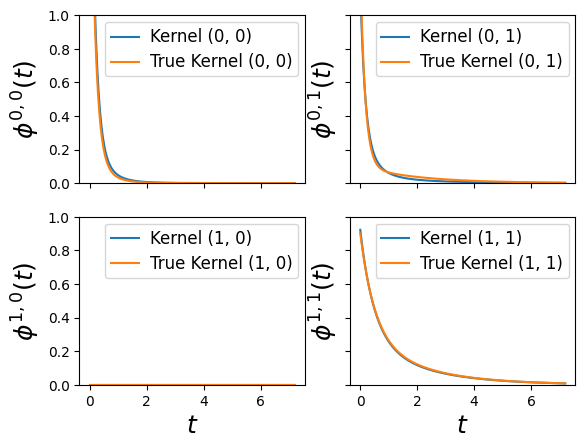

In [9]:
import matplotlib.pyplot as plt

from tick.plot import plot_hawkes_kernels
from tick.hawkes import SimuHawkesSumExpKernels, SimuHawkesMulti, \
    HawkesSumExpKern

end_time = 1000
n_realizations = 10

decays = [.5, 2., 6.]
baseline = [0.12, 0.07]
adjacency = [[[0, .1, .4], [.2, 0., .2]],
             [[0, 0, 0], [.6, .3, 0]]]

hawkes_exp_kernels = SimuHawkesSumExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=False, seed=1039)

multi = SimuHawkesMulti(hawkes_exp_kernels, n_simulations=n_realizations)

multi.end_time = [(i + 1) / 10 * end_time for i in range(n_realizations)]
multi.simulate()

learner = HawkesSumExpKern(decays, penalty='elasticnet',
                           elastic_net_ratio=0.8)
learner.fit(multi.timestamps)

fig = plot_hawkes_kernels(learner, hawkes=hawkes_exp_kernels, show=False)

for ax in fig.axes:
    ax.set_ylim([0., 1.])

## Fit Hawkes on finance data

/usr/local/lib/python3.8/dist-packages/tick/dataset/download_helper.py:214: UserWarning: TICK_DATASETS environment variable was not set. Saving dataset to the default location ~/tick_datasets
  warnings.warn('{} environment variable was not set. Saving dataset'


(5.88 MB) [========================================] 100%


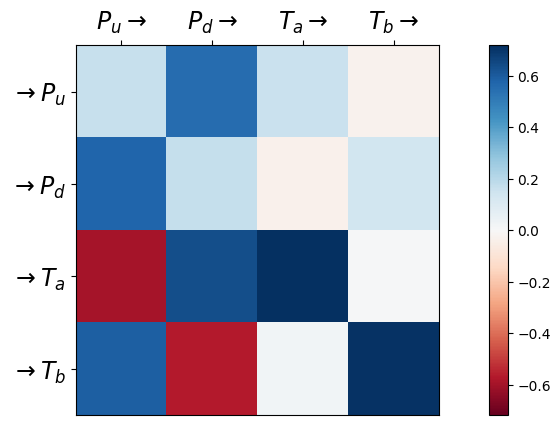

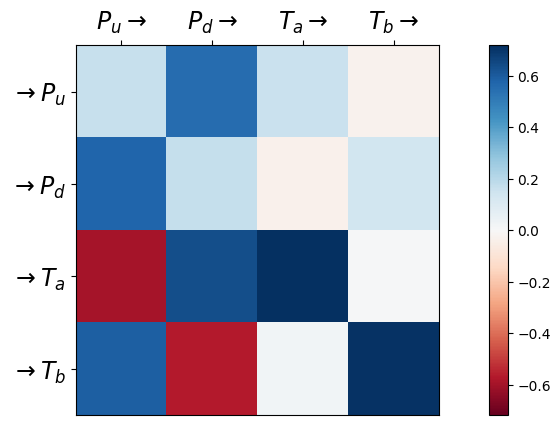

In [11]:
import numpy as np

from tick.dataset import fetch_hawkes_bund_data
from tick.hawkes import HawkesConditionalLaw
from tick.plot import plot_hawkes_kernel_norms

timestamps_list = fetch_hawkes_bund_data()

kernel_discretization = np.hstack((0, np.logspace(-5, 0, 50)))
hawkes_learner = HawkesConditionalLaw(
    claw_method="log", delta_lag=0.1, min_lag=5e-4, max_lag=500,
    quad_method="log", n_quad=10, min_support=1e-4, max_support=1, n_threads=4)

hawkes_learner.fit(timestamps_list)

plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=["P_u", "P_d", "T_a", "T_b"])

## tick.dataset

(98.2 KB) [========================================] 100%


(49.4 KB) [========================================] 100%


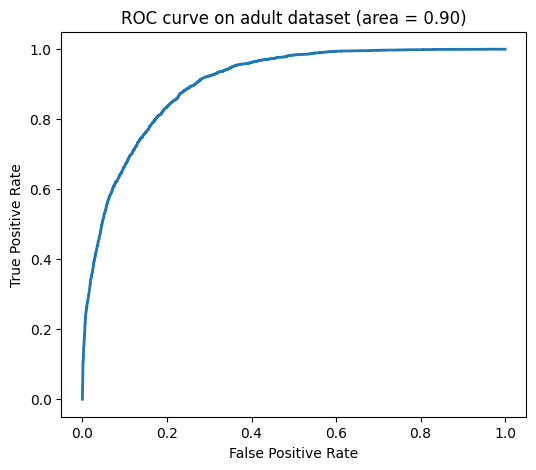

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from tick.linear_model import LogisticRegression
from tick.dataset import fetch_tick_dataset

train_set = fetch_tick_dataset('binary/adult/adult.trn.bz2')
test_set = fetch_tick_dataset('binary/adult/adult.tst.bz2')

learner = LogisticRegression()
learner.fit(train_set[0], train_set[1])

predictions = learner.predict_proba(test_set[0])
fpr, tpr, _ = roc_curve(test_set[1], predictions[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2)
plt.title("ROC curve on adult dataset (area = {:.2f})".format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.show()